## import data and convert to numpy array

In [71]:
import numpy as np

# example equations: ax1 + bx2 = c
# write them as a matrix A and a vector b
# each row of A is [a, b], and corresponding element in b is c

equations = [
    [4, 130, 600000],
    [4, 185, 1900000],
    [2, 90, 303000],
    [3, 135, 780000],
    [2, 100, 925000],
    [4, 120, 900000],
    [3, 222, 950000],
    [3, 200, 910000],
    [3, 154, 885000],
    [2, 66, 300000]
]

# convert to numpy arrays
A = np.array([[e[0], e[1]] for e in equations], dtype=float)
b = np.array([e[2] for e in equations], dtype=float)

# gradient descent and loss function

In [72]:
def compute_loss(A, b, z):
    error = A @ z - b
    loss = np.sum(error**2) # sum of squares of elements in the error vector
    return loss

# The gradient of the loss function L with respect to z is:
# ∇L = 2 * A^T * (Az - b)
def compute_gradient(A, b, z):
    error = A @ z - b
    gradient = 2 * A.T @ error
    return gradient

# Gradient descent loop

In [83]:
# start with random values for x and y
z = np.random.rand(2, 1) * 2 - 1 # Initialize x and y between -1 and 1 (smaller initial range)

# hyperparameters for gradient descent
learning_rate = 0.000001
num_iterations = 200000

loss_history = []

print(f"Initial x1: {z[0,0]:.4f}, Initial x2: {z[1,0]:.4f}")
print(f"Initial Loss: {compute_loss(A, b, z):.4f}")
print("-" * 30)

# gradient Descent Loop
for i in range(num_iterations):
    # calculate the gradient
    grad = compute_gradient(A, b, z)

    z = z - learning_rate * grad

    # compute and store the current loss
    current_loss = compute_loss(A, b, z)
    loss_history.append(current_loss)

    if (i + 1) % 5000 == 0:
        print(f"Iteration {i+1}: Loss = {current_loss:.4f}, x = {z[0,0]:.4f}, y = {z[1,0]:.4f}")

print("-" * 30)
print(f"Optimal x1 found: {z[0,0]:.4f}")
print(f"Optimal x2 found: {z[1,0]:.4f}")
print(f"Final Loss: {loss_history[-1]:.4f}")

Initial x1: -0.0469, Initial x2: 0.2186
Initial Loss: 89391433618449.6562
------------------------------
Iteration 5000: Loss = 8602421319793.9814, x = 11320.1235, y = 3611.1367
Iteration 10000: Loss = 8069880747376.2070, x = 21670.1896, y = 3404.0860
Iteration 15000: Loss = 7618606136024.3604, x = 31197.8710, y = 3213.4869
Iteration 20000: Loss = 7236196258921.1445, x = 39968.5117, y = 3038.0323
Iteration 25000: Loss = 6912142322742.3984, x = 48042.2641, y = 2876.5187
Iteration 30000: Loss = 6637539181347.6162, x = 55474.5006, y = 2727.8385
Iteration 35000: Loss = 6404840618407.4902, x = 62316.1943, y = 2590.9720
Iteration 40000: Loss = 6207651974026.5020, x = 68614.2678, y = 2464.9805
Iteration 45000: Loss = 6040554416647.8672, x = 74411.9155, y = 2348.9999
Iteration 50000: Loss = 5898956031154.8525, x = 79748.8998, y = 2242.2348
Iteration 55000: Loss = 5778965631003.1855, x = 84661.8235, y = 2143.9529
Iteration 60000: Loss = 5677285826686.0117, x = 89184.3813, y = 2053.4801
Iteratio

# visualize the loss history

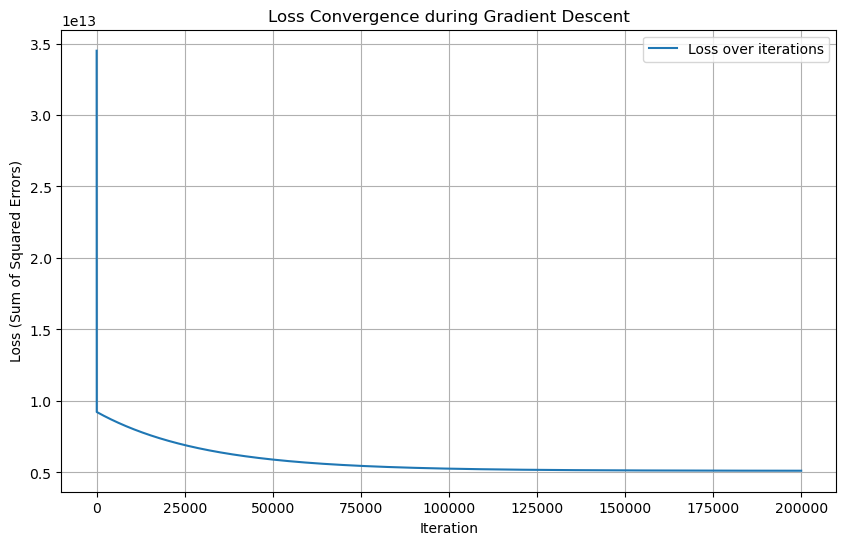

In [84]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(loss_history, label='Loss over iterations')
plt.title('Loss Convergence during Gradient Descent')
plt.xlabel('Iteration')
plt.ylabel('Loss (Sum of Squared Errors)')
plt.grid(True)
plt.legend()
plt.show()